In [1]:
# imports
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cool_maps.plot as cplt
import cartopy.crs as ccrs
import cmocean.cm as cmo
import numpy as np
import gsw
import time

%matplotlib inline

### Pull individually selected gliders from ERDDAP

In [2]:
glider_IDs = ['ru28-20160714T1410',   'ru30-20180705T1825',          'ru28-20190717T1522',    'ru33-20200715T1558',
              'ru30-20210716T1804',   'maracoos_02-20210716T1814',   'sbu01-20220805T1532',   'ru33-20180801T1323']

start = time.time()            # Timer Function, Part 1

# Using the Science Delayed data for each here, except for sbu01 because no delayed dataset
for i in range(1,len(glider_IDs)+1):
    if glider_IDs[i-1] == 'sbu01-20220805T1532':
        filetype = '-profile-sci-rt.csv'
    else:
        filetype = '-profile-sci-delayed.csv'
        
    url = 'http://slocum-data.marine.rutgers.edu/erddap/tabledap/' + glider_IDs[i-1] + filetype + '?time%2Clatitude%2Clongitude%2Cdepth%2Cdensity%2Cprofile_id%2Cprofile_time%2Csalinity%2Ctemperature'
    data = pd.read_csv(url, sep=',',index_col=0,parse_dates=['time'],skiprows=[1])
    data.index = pd.to_datetime(data.index.values, format='%Y-%m-%d %H:%M:%S')
    globals()['df'+str(i)] = data
    print(time.time() - start) # Timer Function, Part 2    

99.95540142059326
301.70062351226807
450.7707839012146
824.182746887207
994.4478952884674
1140.9056718349457
1172.7897338867188
1561.1599991321564


### Check the data

In [3]:
print(glider_IDs[1-1])
df1 = df1.dropna()
df1

ru28-20160714T1410


,latitude,longitude,depth,density,profile_id,profile_time,salinity,temperature
2016-07-14 14:13:37,40.333931,-73.883698,0.029769,1020.87850,1468505689,2016-07-14T14:14:52Z,30.778500,22.5072
2016-07-14 14:13:39,40.333930,-73.883696,0.039692,1020.87980,1468505689,2016-07-14T14:14:52Z,30.780170,22.5071
2016-07-14 14:13:41,40.333928,-73.883695,0.059539,1020.88020,1468505689,2016-07-14T14:14:52Z,30.781460,22.5096
2016-07-14 14:13:43,40.333925,-73.883695,0.049615,1020.87480,1468505689,2016-07-14T14:14:52Z,30.778637,22.5211
2016-07-14 14:13:45,40.333922,-73.883695,0.029769,1020.87300,1468505689,2016-07-14T14:14:52Z,30.777996,22.5256
...,...,...,...,...,...,...,...,...
2016-07-25 15:41:31,39.268238,-74.374917,0.039696,1021.27650,1468513223,2016-07-25T15:39:55Z,31.699610,23.5612
2016-07-25 15:41:33,39.268238,-74.374917,0.039696,1021.29280,1468513223,2016-07-25T15:39:55Z,31.727491,23.5779
2016-07-25 15:41:35,39.268238,-74.374917,0.029772,1021.29724,1468513223,2016-07-25T15:39:55Z,31.735079,23.5820
2016-07-25 15:41:37,39.268238,-74.374917,0.019848,1021.32050,1468513223,2016-07-25T15:39:55Z,31.765394,23.5809


In [4]:
print(glider_IDs[2-1])
df2 = df2.dropna()
df2

ru30-20180705T1825


,latitude,longitude,depth,density,profile_id,profile_time,salinity,temperature
2018-07-05 17:42:31,40.775562,-66.814400,-0.188531,1023.22925,1530812645,2018-07-05T17:44:07Z,32.937313,19.8625
2018-07-05 17:42:35,40.775563,-66.814418,0.446521,1023.24180,1530812645,2018-07-05T17:44:07Z,32.949950,19.8621
2018-07-05 17:42:39,40.775580,-66.814424,0.674742,1023.25210,1530812645,2018-07-05T17:44:07Z,32.960747,19.8581
2018-07-05 17:42:43,40.775599,-66.814428,0.337371,1023.23975,1530812645,2018-07-05T17:44:07Z,32.945454,19.8549
2018-07-05 17:42:48,40.775596,-66.814450,0.565593,1023.23126,1530812645,2018-07-05T17:44:07Z,32.935318,19.8617
...,...,...,...,...,...,...,...,...
2018-08-28 16:53:08,39.361785,-74.281887,-0.238175,1019.94760,1530825747,2018-08-28T16:52:56Z,30.671104,25.4273
2018-08-28 16:52:56,39.361788,-74.281866,0.774068,1019.94790,1530825748,2018-08-28T16:53:02Z,30.663328,25.4215
2018-08-28 16:53:00,39.361787,-74.281873,-0.208403,1019.94710,1530825748,2018-08-28T16:53:02Z,30.667604,25.4207
2018-08-28 16:53:04,39.361786,-74.281880,0.595437,1019.95110,1530825748,2018-08-28T16:53:02Z,30.668802,25.4218


In [5]:
print(glider_IDs[3-1])
df3 = df3.dropna()
df3

ru28-20190717T1522


,latitude,longitude,depth,density,profile_id,profile_time,salinity,temperature
2019-07-17 15:25:19,40.357835,-73.824263,7.462015,1019.44794,1563377169,2019-07-17T15:26:39Z,29.393120,23.9721
2019-07-17 15:26:45,40.357965,-73.824327,0.158769,1019.07214,1563377169,2019-07-17T15:26:39Z,29.274635,24.8420
2019-07-17 15:26:47,40.357973,-73.824331,0.158769,1019.07200,1563377169,2019-07-17T15:26:39Z,29.274330,24.8418
2019-07-17 15:26:50,40.357982,-73.824335,0.178615,1019.07666,1563377169,2019-07-17T15:26:39Z,29.278973,24.8382
2019-07-17 15:26:52,40.357990,-73.824339,0.148846,1019.07660,1563377169,2019-07-17T15:26:39Z,29.278950,24.8378
...,...,...,...,...,...,...,...,...
2019-08-06 13:59:55,39.249069,-74.296443,-0.029772,1020.18110,1563385490,2019-08-06T13:58:44Z,30.606167,24.4840
2019-08-06 13:59:57,39.249071,-74.296439,-0.029772,1020.17975,1563385490,2019-08-06T13:58:44Z,30.614357,24.5095
2019-08-06 13:59:59,39.249073,-74.296435,-0.059544,1020.17830,1563385490,2019-08-06T13:58:44Z,30.609892,24.5027
2019-08-06 14:00:01,39.249074,-74.296435,-0.049620,1020.17860,1563385490,2019-08-06T13:58:44Z,30.610940,24.5045


In [6]:
print(glider_IDs[4-1])
df4 = df4.dropna()
df4

ru33-20200715T1558


,latitude,longitude,depth,density,profile_id,profile_time,salinity,temperature
2020-07-15 15:04:40,39.409705,-74.196787,0.187264,1020.51056,1594825504,2020-07-15T15:05:04Z,31.192980,24.8690
2020-07-15 15:04:41,39.409671,-74.196858,0.197784,1020.51074,1594825504,2020-07-15T15:05:04Z,31.193605,24.8701
2020-07-15 15:04:42,39.409637,-74.196930,0.188555,1020.51110,1594825504,2020-07-15T15:05:04Z,31.193953,24.8696
2020-07-15 15:04:43,39.409603,-74.197002,0.247602,1020.51337,1594825504,2020-07-15T15:05:04Z,31.196075,24.8683
2020-07-15 15:04:44,39.409569,-74.197075,0.223189,1020.51290,1594825504,2020-07-15T15:05:04Z,31.196220,24.8699
...,...,...,...,...,...,...,...,...
2020-08-20 15:17:55,39.404674,-74.243422,0.090010,1020.52070,1594835202,2020-08-20T15:17:00Z,30.660890,23.4594
2020-08-20 15:17:57,39.404677,-74.243421,0.114621,1020.52330,1594835202,2020-08-20T15:17:00Z,30.663378,23.4572
2020-08-20 15:17:58,39.404679,-74.243420,0.109262,1020.51880,1594835202,2020-08-20T15:17:00Z,30.658705,23.4606
2020-08-20 15:18:00,39.404682,-74.243419,0.096957,1020.52704,1594835202,2020-08-20T15:17:00Z,30.666285,23.4516


In [7]:
print(glider_IDs[5-1])
df5 = df5.dropna()
df5

ru30-20210716T1804


,latitude,longitude,depth,density,profile_id,profile_time,salinity,temperature
2021-07-16 18:06:24.710,39.433256,-74.228396,5.448152,1018.91920,1626458806,2021-07-16T18:06:48.11Z,28.952770,24.6165
2021-07-16 18:06:31.570,39.433247,-74.228389,6.480208,1020.67410,1626458806,2021-07-16T18:06:48.11Z,30.795956,23.3782
2021-07-16 18:06:33.700,39.433247,-74.228389,6.857304,1021.04584,1626458806,2021-07-16T18:06:48.11Z,31.307308,23.4359
2021-07-16 18:06:34.750,39.433247,-74.228389,7.174858,1021.34485,1626458806,2021-07-16T18:06:48.11Z,31.458292,22.7916
2021-07-16 18:06:36.760,39.433246,-74.228389,7.561876,1021.56120,1626458806,2021-07-16T18:06:48.11Z,31.546135,22.2625
...,...,...,...,...,...,...,...,...
2021-08-20 16:57:31.100,39.334735,-74.221031,0.168708,1020.19824,1629478576,2021-08-20T16:56:16.31Z,30.782738,24.8784
2021-08-20 16:57:33.150,39.334736,-74.221035,0.079392,1020.19476,1629478576,2021-08-20T16:56:16.31Z,30.780687,24.8837
2021-08-20 16:57:35.220,39.334736,-74.221039,0.039696,1020.19336,1629478576,2021-08-20T16:56:16.31Z,30.779516,24.8849
2021-08-20 16:57:37.270,39.334737,-74.221043,0.059544,1020.19586,1629478576,2021-08-20T16:56:16.31Z,30.781301,24.8812


In [8]:
print(glider_IDs[6-1])
df6 = df6.dropna()
df6

maracoos_02-20210716T1814


,latitude,longitude,depth,density,profile_id,profile_time,salinity,temperature
2021-07-16 18:14:41,39.433470,-74.228148,-0.079391,1018.87100,1626459326,2021-07-16T18:15:25Z,28.960600,24.7183
2021-07-16 18:14:43,39.433469,-74.228147,-0.059543,1018.87054,1626459326,2021-07-16T18:15:25Z,28.961600,24.7225
2021-07-16 18:14:45,39.433468,-74.228145,-0.029772,1018.87240,1626459326,2021-07-16T18:15:25Z,28.962450,24.7189
2021-07-16 18:14:47,39.433467,-74.228143,-0.029772,1018.87220,1626459326,2021-07-16T18:15:25Z,28.961420,24.7170
2021-07-16 18:14:49,39.433467,-74.228142,-0.049620,1018.87396,1626459326,2021-07-16T18:15:25Z,28.962046,24.7123
...,...,...,...,...,...,...,...,...
2021-08-13 16:11:49,39.455685,-74.226670,2.808440,1020.40070,1628871072,2021-08-13T16:11:12Z,30.609493,23.7828
2021-08-13 16:11:51,39.455684,-74.226672,2.629813,1020.39630,1628871072,2021-08-13T16:11:12Z,30.608734,23.7934
2021-08-13 16:11:53,39.455683,-74.226675,2.441261,1020.38995,1628871072,2021-08-13T16:11:12Z,30.607803,23.8101
2021-08-13 16:11:55,39.455682,-74.226678,2.242786,1020.38440,1628871072,2021-08-13T16:11:12Z,30.605894,23.8213


In [9]:
print(glider_IDs[7-1])
df7 = df7.dropna()
df7

sbu01-20220805T1532


,latitude,longitude,depth,density,profile_id,profile_time,salinity,temperature
2022-08-05 15:32:26.330,40.752020,-72.420427,0.109150,1021.32446,1659713735,2022-08-05T15:36:25.86Z,31.931194,23.9994
2022-08-05 15:35:43.120,40.751930,-72.420612,3.631682,1021.35706,1659713735,2022-08-05T15:36:25.86Z,31.953274,23.9977
2022-08-05 15:35:51.340,40.751908,-72.420632,5.149825,1021.39560,1659713735,2022-08-05T15:36:25.86Z,31.997417,24.0027
2022-08-05 15:35:59.590,40.751885,-72.420653,6.459586,1021.47800,1659713735,2022-08-05T15:36:25.86Z,32.120014,24.0572
2022-08-05 15:36:07.920,40.751862,-72.420674,8.453980,1021.68964,1659713735,2022-08-05T15:36:25.86Z,32.393795,24.0707
...,...,...,...,...,...,...,...,...
2022-09-04 10:47:22.410,40.023345,-73.938180,7.025629,1021.61970,1662288413,2022-09-04T10:46:55.82Z,32.180660,23.7377
2022-09-04 10:47:30.650,40.023356,-73.938184,6.013477,1021.61633,1662288413,2022-09-04T10:46:55.82Z,32.182175,23.7379
2022-09-04 10:47:38.710,40.023366,-73.938187,5.070782,1021.61300,1662288413,2022-09-04T10:46:55.82Z,32.185310,23.7434
2022-09-04 10:47:46.820,40.023377,-73.938190,3.969311,1021.57050,1662288413,2022-09-04T10:46:55.82Z,32.151424,23.7848


In [10]:
print(glider_IDs[8-1])
df8 = df8.dropna()
df8 = df8[(df8.index > '2018-08-01 00:00:00')  &  (df8.index < '2018-09-01 00:00:00')] # limit time frame to August
df8

ru33-20180801T1323


,latitude,longitude,depth,density,profile_id,profile_time,salinity,temperature
2018-08-01 13:44:01,39.335563,-74.331771,0.138936,1020.44775,1533131135,2018-08-01T13:45:34Z,30.888962,24.3055
2018-08-01 13:44:05,39.335778,-74.331659,0.168708,1020.44836,1533131135,2018-08-01T13:45:34Z,30.889710,24.3059
2018-08-01 13:44:09,39.335992,-74.331548,0.208404,1020.44916,1533131135,2018-08-01T13:45:34Z,30.890165,24.3049
2018-08-01 13:44:13,39.336208,-74.331436,0.258024,1020.44904,1533131135,2018-08-01T13:45:34Z,30.890137,24.3061
2018-08-01 13:44:17,39.336422,-74.331324,0.218328,1020.45010,1533131135,2018-08-01T13:45:34Z,30.889751,24.3010
...,...,...,...,...,...,...,...,...
2018-08-31 23:59:50,39.296302,-73.800690,16.373991,1024.54320,1533142720,2018-09-01T00:00:51Z,32.317207,12.2217
2018-08-31 23:59:52,39.296303,-73.800692,16.612150,1024.56160,1533142720,2018-09-01T00:00:51Z,32.322440,12.1510
2018-08-31 23:59:54,39.296304,-73.800693,16.870153,1024.58030,1533142720,2018-09-01T00:00:51Z,32.331627,12.0953
2018-08-31 23:59:56,39.296305,-73.800695,17.108310,1024.57310,1533142720,2018-09-01T00:00:51Z,32.317280,12.0797


### Create Map to visualize the glider tracks

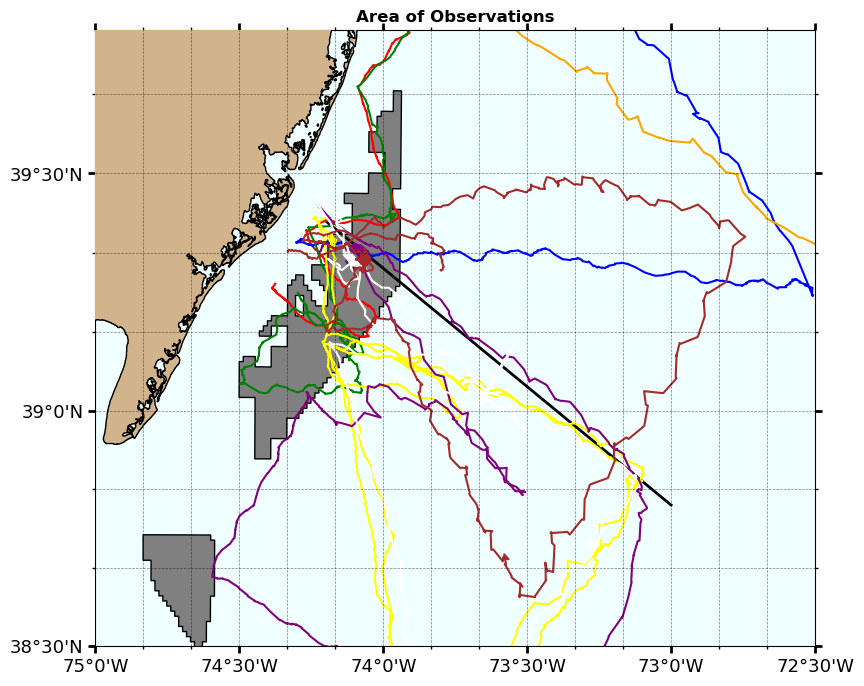

In [11]:
# Create our box plot
from shapely.geometry.polygon import LinearRing

extent= [-75.0,-72.5,38.5,39.8]

#use cool maps to create cartopy map
fig, ax = cplt.create(extent, proj=ccrs.Mercator(),gridlines=True, bathymetry=False, oceancolor='azure')
plt.title('Area of Observations',fontweight='bold')

# Plot the E-Line
ed1_lat, ed1_lon = 39.4, -74.2
ed2_lat, ed2_lon = 38.8, -73.0

EL = plt.plot([ed1_lon, ed2_lon], [ed1_lat, ed2_lat],
         color='black', linewidth=2, marker='o', markersize=0,
         transform=ccrs.PlateCarree())

# Plot OWF lease areas
lease_area = pd.read_pickle("lease_area.pkl")
lease_area.plot(ax= ax, color = 'grey', edgecolor = 'k', transform = ccrs.PlateCarree())

# Plot glider tracks
plt.plot(df1.longitude,df1.latitude, color= 'red', transform=ccrs.PlateCarree(), label = 'df1')
plt.plot(df2.longitude,df2.latitude, color= 'blue', transform=ccrs.PlateCarree(), label = 'df2')
plt.plot(df3.longitude,df3.latitude, color= 'green', transform=ccrs.PlateCarree(), label = 'df3')
plt.plot(df4.longitude,df4.latitude, color= 'yellow', transform=ccrs.PlateCarree(), label = 'df4')
plt.plot(df5.longitude,df5.latitude, color= 'purple', transform=ccrs.PlateCarree(), label = 'df5')
plt.plot(df6.longitude,df6.latitude, color= 'white', transform=ccrs.PlateCarree(), label = 'df6')
plt.plot(df7.longitude,df7.latitude, color= 'orange', transform=ccrs.PlateCarree(), label = 'df7')
plt.plot(df8.longitude,df8.latitude, color= 'brown', transform=ccrs.PlateCarree(), label = 'df8')
plt.legend()
plt.show()

### Now we create the new envelope shape around the endurance line

In [13]:
# First we need to get the bearing of the endurance line, in order to properly calculate the distances off the line
# Code taken from https://stackoverflow.com/questions/54873868/python-calculate-bearing-between-two-lat-long
import math

def get_bearing(lat1, long1, lat2, long2):
    dLon = (long2 - long1)
    x = math.cos(math.radians(lat2)) * math.sin(math.radians(dLon))
    y = math.cos(math.radians(lat1)) * math.sin(math.radians(lat2)) - math.sin(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.cos(math.radians(dLon))
    brng = np.arctan2(x,y)
    brng = np.degrees(brng)

    return brng


bearing1 = get_bearing(ed1_lat,ed1_lon,ed2_lat,ed2_lon) # From N (0 deg) clockwise to the e-line
bearing2 = get_bearing(ed2_lat,ed2_lon,ed1_lat,ed1_lon) # From N (0 deg) counter-clockwise to the e-line
bearing1 + abs(bearing2) # Approximately 180 degrees, just a sanity check

179.24316199562884

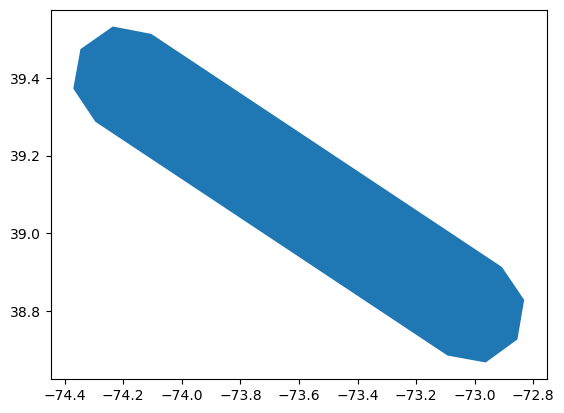

In [14]:
# Now we can calculate a few lat/lons about the e-line to have a good approximation of the conditions. This specified distance can be easily changed below.
# Code taken from https://stackoverflow.com/questions/7222382/get-lat-long-given-current-point-distance-and-bearing
from math import asin, atan2, cos, degrees, radians, sin

def get_point_at_distance(lat1, lon1, d, bearing, R=6371):
    """
    lat: initial latitude, in degrees
    lon: initial longitude, in degrees
    d: target distance from initial
    bearing: (true) heading in degrees
    R: optional radius of sphere, defaults to mean radius of earth

    Returns new lat/lon coordinate {d}km from initial, in degrees
    """
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    a = radians(bearing)
    lat2 = asin(sin(lat1) * cos(d/R) + cos(lat1) * sin(d/R) * cos(a))
    lon2 = lon1 + atan2(
        sin(a) * sin(d/R) * cos(lat1),
        cos(d/R) - sin(lat1) * sin(lat2)
    )
    return (degrees(lat2), degrees(lon2),)


# Now we calculate 10 points to make a decagon about the e-line, which will be used as the envelope to filter glider data.
distance = 15 # In kilometers

ed_lat_01, ed_lon_01 = get_point_at_distance(ed1_lat, ed1_lon, distance, bearing2 + 90)
ed_lat_02, ed_lon_02 = get_point_at_distance(ed1_lat, ed1_lon, distance, bearing2 + 45)
ed_lat_03, ed_lon_03 = get_point_at_distance(ed1_lat, ed1_lon, distance, bearing2 +  0)
ed_lat_04, ed_lon_04 = get_point_at_distance(ed1_lat, ed1_lon, distance, bearing2 - 45)
ed_lat_05, ed_lon_05 = get_point_at_distance(ed1_lat, ed1_lon, distance, bearing2 - 90)
ed_lat_06, ed_lon_06 = get_point_at_distance(ed2_lat, ed2_lon, distance, bearing1 + 90)
ed_lat_07, ed_lon_07 = get_point_at_distance(ed2_lat, ed2_lon, distance, bearing1 + 45)
ed_lat_08, ed_lon_08 = get_point_at_distance(ed2_lat, ed2_lon, distance, bearing1 +  0)
ed_lat_09, ed_lon_09 = get_point_at_distance(ed2_lat, ed2_lon, distance, bearing1 - 45)
ed_lat_10, ed_lon_10 = get_point_at_distance(ed2_lat, ed2_lon, distance, bearing1 - 90)
ed_lat = [ed_lat_01, ed_lat_02, ed_lat_03, ed_lat_04, ed_lat_05, ed_lat_06, ed_lat_07, ed_lat_08, ed_lat_09, ed_lat_10]
ed_lon = [ed_lon_01, ed_lon_02, ed_lon_03, ed_lon_04, ed_lon_05, ed_lon_06, ed_lon_07, ed_lon_08, ed_lon_09, ed_lon_10]
plt.fill(ed_lon,ed_lat) # Sanity check

### Trim each glider mission to just the data within this new envelope

In [15]:
from matplotlib import path
p = path.Path(np.array([ed_lon,ed_lat]).T) # Combines lat and lon into a single 2 x 10 array, then rotates it to the necessary layout for Path (10 x 2)
print(p)

# This has now created your polygon as a shape that can be checked against

Path(array([[-74.10433018,  39.51287667],
       [-74.23585481,  39.53202786],
       [-74.3462799 ,  39.473716  ],
       [-74.3707974 ,  39.37222139],
       [-74.29536058,  39.28704523],
       [-73.09263543,  38.68608252],
       [-72.96235115,  38.66833739],
       [-72.85402301,  38.72759954],
       [-72.83099662,  38.82927364],
       [-72.90706802,  38.91384411]]), None)


In [16]:
# An example of how this works with the first dataset, before running a loop after another sanity check
true_or_false_for_each_lat_lon_in_dataframe = p.contains_points(np.array([df1.longitude,df1.latitude]).T)
print('Length of the untrimmed dataset: ' + str(len(df1)),
      '\nLength of True/False boolean array: ' + str(len(true_or_false_for_each_lat_lon_in_dataframe)), 
      '\nNumber of Trues in the array: ' + str(np.count_nonzero(true_or_false_for_each_lat_lon_in_dataframe)))

# And the number of Trues in the array matches the length of the dataset below. 
df1[true_or_false_for_each_lat_lon_in_dataframe]

Length of the untrimmed dataset: 433889 
Length of True/False boolean array: 433889 
Number of Trues in the array: 148787


,latitude,longitude,depth,density,profile_id,profile_time,salinity,temperature
2016-07-20 06:53:49,39.444594,-73.967859,20.194130,1024.76940,1468509516,2016-07-20T06:54:43Z,32.606160,12.3016
2016-07-20 06:53:51,39.444588,-73.967857,19.737675,1024.76610,1468509516,2016-07-20T06:54:43Z,32.604656,12.3020
2016-07-20 06:53:53,39.444583,-73.967856,19.410220,1024.76390,1468509516,2016-07-20T06:54:43Z,32.603737,12.3020
2016-07-20 06:53:55,39.444577,-73.967855,19.181990,1024.76270,1468509516,2016-07-20T06:54:43Z,32.603400,12.3015
2016-07-20 06:53:57,39.444572,-73.967853,18.894224,1024.76090,1468509516,2016-07-20T06:54:43Z,32.602753,12.3015
...,...,...,...,...,...,...,...,...
2016-07-24 00:33:09,39.167243,-74.055558,6.043715,1022.14170,1468511993,2016-07-24T00:32:24Z,32.060436,21.5463
2016-07-24 00:33:11,39.167240,-74.055560,5.855162,1022.21826,1468511993,2016-07-24T00:32:24Z,32.135740,21.4721
2016-07-24 00:33:13,39.167237,-74.055562,5.686456,1022.25476,1468511993,2016-07-24T00:32:24Z,32.169613,21.4299
2016-07-24 00:33:15,39.167234,-74.055564,5.507826,1022.33600,1468511993,2016-07-24T00:32:24Z,32.251255,21.3561


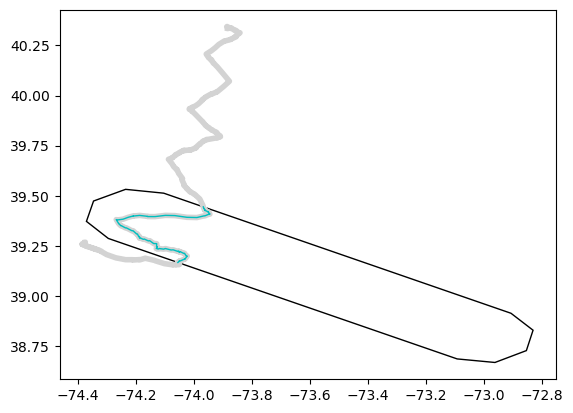

In [17]:
# We can also visualize this to be sure
plt.plot(df1.longitude,df1.latitude,'lightgray', linewidth=4)
plt.plot(df1[true_or_false_for_each_lat_lon_in_dataframe].longitude,df1[true_or_false_for_each_lat_lon_in_dataframe].latitude, 'c', linewidth = 1)
plt.fill(ed_lon,ed_lat, facecolor='none', edgecolor = 'k')

In [18]:
# Now we loop the code and trim our datasets down to just what's in the envelope. 
for i in range(1,len(glider_IDs)+1):
    data = globals()['df'+str(i)]
    true_or_false_for_each_lat_lon_in_dataframe = p.contains_points(np.array([data.longitude,data.latitude]).T)
    globals()['df'+str(i)] = data[true_or_false_for_each_lat_lon_in_dataframe]
    print(['df'+str(i) + ' was trimmed from ' + str(len(data)) + ' to ' + str(len(data[true_or_false_for_each_lat_lon_in_dataframe]))]) # Sanity Check

['df1 was trimmed from 433889 to 148787']
['df2 was trimmed from 2015919 to 216884']
['df3 was trimmed from 765426 to 135565']
['df4 was trimmed from 1755178 to 716340']
['df5 was trimmed from 790875 to 302701']
['df6 was trimmed from 586717 to 383500']
['df7 was trimmed from 91830 to 0']
['df8 was trimmed from 1149408 to 548575']


### Now we remake the map plot with the trimmed datasets

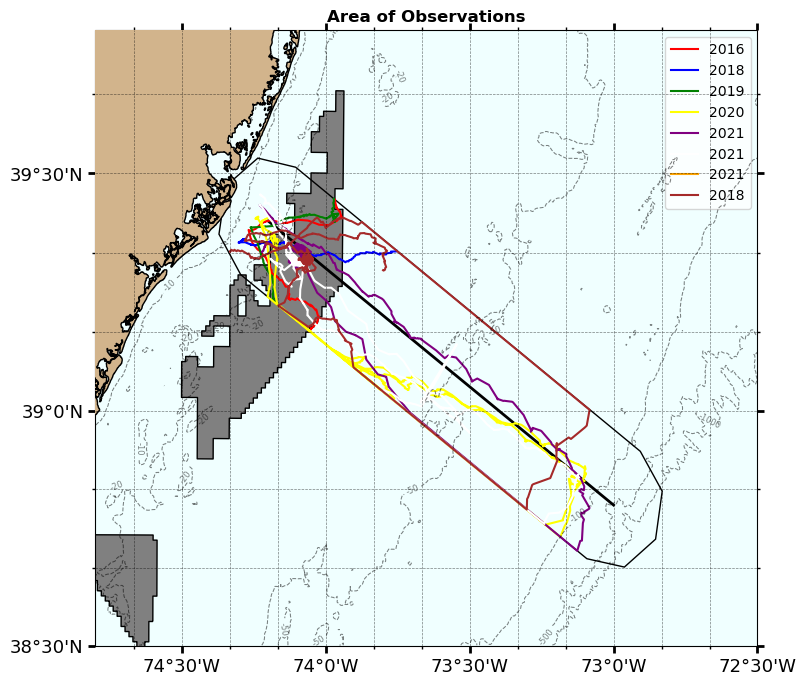

In [19]:
extent= [-74.8,-72.5,38.5,39.8]

#use cool maps to create cartopy map
fig, ax = cplt.create(extent, proj=ccrs.Mercator(),gridlines=True, bathymetry=True, isobaths=(-1000, -500, -100, -50, -20, -10), oceancolor='azure')
plt.title('Area of Observations',fontweight='bold')
   
ed1_lat, ed1_lon = 39.4, -74.2
ed2_lat, ed2_lon = 38.8, -73.0

EL = plt.plot([ed1_lon, ed2_lon], [ed1_lat, ed2_lat], color='black', linewidth=2, marker='o', markersize=0, transform=ccrs.PlateCarree())

lease_area = pd.read_pickle("lease_area.pkl"); lease_area.plot(ax= ax, color = 'gray', edgecolor = 'k', transform = ccrs.PlateCarree())

# Plot glider transects that have been trimmed to just what is inside the e-line envelope
plt.plot(df1.longitude,df1.latitude, color= 'red', label = '2016', transform=ccrs.PlateCarree())
plt.plot(df2.longitude,df2.latitude, color= 'blue', label = '2018', transform=ccrs.PlateCarree())
plt.plot(df3.longitude,df3.latitude, color= 'green', label = '2019', transform=ccrs.PlateCarree())
plt.plot(df4.longitude,df4.latitude, color= 'yellow', label = '2020', transform=ccrs.PlateCarree())
plt.plot(df5.longitude,df5.latitude, color= 'purple', label = '2021', transform=ccrs.PlateCarree())
plt.plot(df6.longitude,df6.latitude, color= 'white', label = '2021', transform=ccrs.PlateCarree())
plt.plot(df7.longitude,df7.latitude, color= 'orange', label = '2021', transform=ccrs.PlateCarree())
plt.plot(df8.longitude,df8.latitude, color= 'brown', label = '2018', transform=ccrs.PlateCarree())

##Plot box around endurance line using polygon
plt.fill(ed_lon,ed_lat, facecolor='none', edgecolor = 'k', transform=ccrs.PlateCarree())
plt.legend()

# Now to separate nearshore and offshore, starting with bathymetry

In [20]:
# https://github.com/rucool/cool_maps/blob/main/cool_maps/download.py
from erddapy import ERDDAP

def get_bathymetry(extent=(-100, -45, 5, 46),
                   server="https://hfr.marine.rutgers.edu/erddap/",
                   dataset_id="bathymetry_srtm15_v24"
                   ):
    """
    Function to select bathymetry within a bounding box.
    This function pulls GEBCO 2014 bathy data from hfr.marine.rutgers.edu 
    Args:
        extent (tuple, optional): Cartopy bounding box. Defaults to (-100, -45, 5, 46).
    Returns:
        xarray.Dataset: xarray Dataset containing bathymetry data
    """
    lons = extent[:2]
    lats = extent[2:]

    e = ERDDAP(
        server=server,
        protocol="griddap"
    )

    e.dataset_id = dataset_id

    e.griddap_initialize()

    # Modify constraints
    e.constraints["latitude<="] = max(lats)
    e.constraints["latitude>="] = min(lats)
    e.constraints["longitude>="] = max(lons)
    e.constraints["longitude<="] = min(lons)

    # return xarray dataset
    return e.to_xarray()

# Save the baythmetry in our specified extent as an xarray dataset
bathy = get_bathymetry(extent=extent)
bathy

<xarray.Dataset>
Dimensions:    (latitude: 313, longitude: 553)
Coordinates:
  * latitude   (latitude) float64 38.5 38.51 38.51 38.51 ... 39.79 39.8 39.8
  * longitude  (longitude) float64 -74.8 -74.79 -74.79 ... -72.51 -72.5 -72.5
Data variables:
    z          (latitude, longitude) float32 ...
Attributes: (12/25)
    cdm_data_type:              Grid
    Conventions:                CF-1.7, COARDS, ACDD-1.3
    Easternmost_Easting:        -72.49791666666667
    geospatial_lat_max:         39.80208333333334
    geospatial_lat_min:         38.50208333333333
    geospatial_lat_resolution:  0.004166666666666667
    ...                         ...
    sourceUrl:                  (local files)
    Southernmost_Northing:      38.50208333333333
    standard_name_vocabulary:   CF Standard Name Table v70
    summary:                    Produced by grdmath. Data from a local source.
    title:                      SRTM15+: Global Bathymetry and Topgraphy at 1...
    Westernmost_Easting:        -74.79791666666667

### Double check the bathymetry

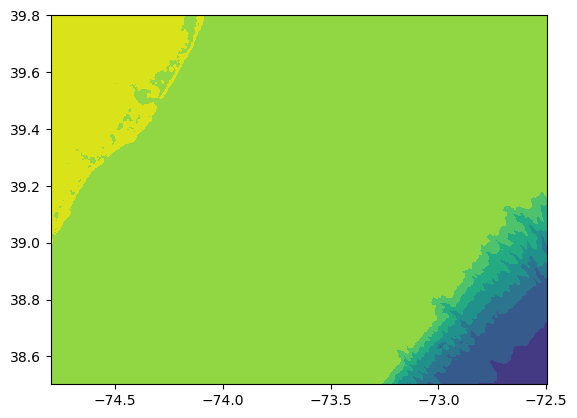

In [21]:
plt.contourf(bathy.longitude,bathy.latitude,bathy.z)

### Now nested loops. For each glider, for the length of the trimmed dataset, find the nearest lat/lon in the bathy dataset, then take the bathy value (z) and save it to a variable. Once that's done for the whole length of the glider, add it to the trimmed dataset for easy management.

In [22]:
#### Original method for nested loop through all the gliders, took ~4 hours to run
# start = time.time() # Timer Function, Part 1

# # Can either run throug all the data or just the first dataset

# # for j in range(1,len(glider_IDs)+1):         #all datasets
# for j in [3]:                                  #each dataset
#     nearest_bathy_value = []
#     for i in range(len(globals()['df'+str(j)])):
#         ilon = list(bathy.longitude.values).index(bathy.sel(longitude=globals()['df'+str(j)]['longitude'][i], method='nearest').longitude)
#         ilat = list(bathy.latitude.values).index(bathy.sel(latitude=globals()['df'+str(j)]['latitude'][i], method='nearest').latitude)
#         nearest_bathy_value.append(bathy.z[ilat,ilon].values)

#     globals()['df'+str(j)]['nearest_bathy_value'] = nearest_bathy_value
#     print(time.time() - start) # Timer Function, Part 2


In [23]:
# for [#] in loop: df1 is 1, df2 is 2, df3 is 3, etc...
for j in [8]:                            
    nearest_bathy_value = []
    lons = xr.DataArray(globals()['df'+str(j)].longitude.values, dims='point')
    lats = xr.DataArray(globals()['df'+str(j)].latitude.values, dims='point')
    bathy_nearest = bathy[['z']].sel(longitude = lons, latitude = lats, method='nearest')
    globals()['df'+str(j)]['nearest_bathy_value'] = bathy_nearest.z.values

# Save each dataset and merged dataset as a pickle file so we don't have to run the loop everytime

In [24]:
# df1.to_pickle('df1_unsampled')  # where to save it, usually as a .pkl
# df2.to_pickle('df2_unsampled')
# df3.to_pickle('df3_unsampled')
# df4.to_pickle('df4_unsampled')
# df5.to_pickle('df5_unsampled')
# df6.to_pickle('df6_unsampled')
# df8.to_pickle('df8_unsampled')

In [25]:
df1 = pd.read_pickle('df1_unsampled')
df2 = pd.read_pickle('df2_unsampled')
df3 = pd.read_pickle('df3_unsampled')
df4 = pd.read_pickle('df4_unsampled')
df5 = pd.read_pickle('df5_unsampled')
df6 = pd.read_pickle('df6_unsampled')
df8 = pd.read_pickle('df8_unsampled')
mergedf = pd.read_pickle('all_df')

In [26]:
mergedf = pd.concat([df1,df2,df3,df4,df5,df6,df8])
mergedf.to_pickle('all_df')
mergedf

,latitude,longitude,depth,density,profile_id,profile_time,salinity,temperature,nearest_bathy_value
2016-07-20 06:53:49,39.444594,-73.967859,20.194130,1024.76940,1468509516,2016-07-20T06:54:43Z,32.606160,12.3016,-24.00894
2016-07-20 06:53:51,39.444588,-73.967857,19.737675,1024.76610,1468509516,2016-07-20T06:54:43Z,32.604656,12.3020,-24.00894
2016-07-20 06:53:53,39.444583,-73.967856,19.410220,1024.76390,1468509516,2016-07-20T06:54:43Z,32.603737,12.3020,-24.00894
2016-07-20 06:53:55,39.444577,-73.967855,19.181990,1024.76270,1468509516,2016-07-20T06:54:43Z,32.603400,12.3015,-24.00894
2016-07-20 06:53:57,39.444572,-73.967853,18.894224,1024.76090,1468509516,2016-07-20T06:54:43Z,32.602753,12.3015,-24.00894
...,...,...,...,...,...,...,...,...,...
2018-10-08 21:40:57,39.230844,-74.182839,20.789906,1022.33700,1533152133,2018-10-08T21:41:57Z,32.299900,21.7339,-27.0
2018-10-08 21:40:59,39.230843,-74.182846,20.541828,1022.33580,1533152133,2018-10-08T21:41:57Z,32.299740,21.7337,-27.0
2018-10-08 21:41:01,39.230842,-74.182853,20.254059,1022.33484,1533152133,2018-10-08T21:41:57Z,32.300230,21.7339,-27.0
2018-10-08 21:41:03,39.230841,-74.182860,19.986135,1022.33410,1533152133,2018-10-08T21:41:57Z,32.300520,21.7331,-27.0


### Now let's just check one to make sure...

In [27]:
df2[df2.nearest_bathy_value<-30]

,latitude,longitude,depth,density,profile_id,profile_time,salinity,temperature,nearest_bathy_value
2018-08-22 22:58:31,39.337547,-73.753907,25.175617,1025.1909,1530822675,2018-08-22T22:59:03Z,32.557938,9.8373,-33.31885
2018-08-22 22:58:33,39.337548,-73.753914,25.314535,1025.1865,1530822675,2018-08-22T22:59:03Z,32.555183,9.8547,-33.31885
2018-08-22 22:58:35,39.337549,-73.753922,24.302412,1025.1725,1530822675,2018-08-22T22:59:03Z,32.548252,9.8792,-33.31885
2018-08-22 22:58:37,39.337550,-73.753929,23.637580,1025.1602,1530822675,2018-08-22T22:59:03Z,32.541410,9.9031,-33.31885
2018-08-22 22:58:39,39.337552,-73.753936,23.955112,1025.1539,1530822675,2018-08-22T22:59:03Z,32.536450,9.9259,-33.31885
...,...,...,...,...,...,...,...,...,...
2018-08-23 18:46:15,39.318463,-73.945808,20.581358,1024.0792,1530822748,2018-08-23T18:47:00Z,31.996803,13.4348,-30.875748
2018-08-23 18:46:17,39.318465,-73.945814,19.995900,1024.0769,1530822748,2018-08-23T18:47:00Z,31.999557,13.4438,-30.875748
2018-08-23 18:46:19,39.318467,-73.945820,19.102825,1024.0642,1530822748,2018-08-23T18:47:00Z,31.989573,13.4489,-30.875748
2018-08-23 18:46:20,39.318468,-73.945823,19.430286,1024.0731,1530822748,2018-08-23T18:47:00Z,32.002440,13.4613,-30.875748


In [28]:
df2[df2.nearest_bathy_value>-30]

,latitude,longitude,depth,density,profile_id,profile_time,salinity,temperature,nearest_bathy_value
2018-08-23 19:22:16,39.319102,-73.951862,-0.238176,1020.27830,1530822758,2018-08-23T19:23:31Z,30.709444,24.4154,-29.455498
2018-08-23 19:22:18,39.319067,-73.951881,-0.168708,1020.27783,1530822758,2018-08-23T19:23:31Z,30.708736,24.4163,-29.455498
2018-08-23 19:22:20,39.319070,-73.951882,-0.148860,1020.27704,1530822758,2018-08-23T19:23:31Z,30.707890,24.4171,-29.455498
2018-08-23 19:22:22,39.319075,-73.951882,-0.079392,1020.27810,1530822758,2018-08-23T19:23:31Z,30.708395,24.4159,-29.455498
2018-08-23 19:22:24,39.319079,-73.951887,0.069468,1020.27900,1530822758,2018-08-23T19:23:31Z,30.708883,24.4162,-29.455498
...,...,...,...,...,...,...,...,...,...
2018-08-28 16:53:08,39.361785,-74.281887,-0.238175,1019.94760,1530825747,2018-08-28T16:52:56Z,30.671104,25.4273,-15.645611
2018-08-28 16:52:56,39.361788,-74.281866,0.774068,1019.94790,1530825748,2018-08-28T16:53:02Z,30.663328,25.4215,-15.645611
2018-08-28 16:53:00,39.361787,-74.281873,-0.208403,1019.94710,1530825748,2018-08-28T16:53:02Z,30.667604,25.4207,-15.645611
2018-08-28 16:53:04,39.361786,-74.281880,0.595437,1019.95110,1530825748,2018-08-28T16:53:02Z,30.668802,25.4218,-15.645611


### ... or plot them as you want

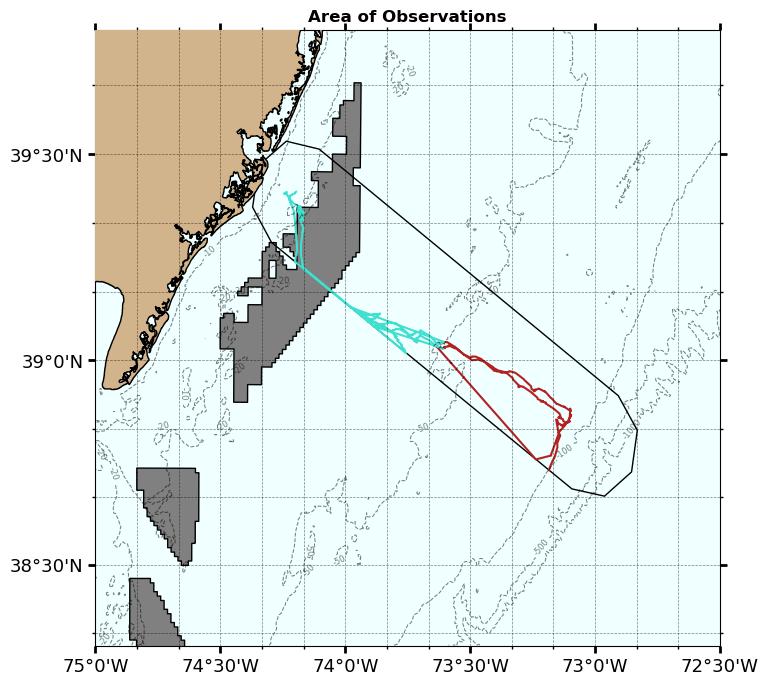

In [29]:
extent= [-75.0,-72.5,38.3,39.8]

#use cool maps to create cartopy map
fig, ax = cplt.create(extent, proj=ccrs.Mercator(),gridlines=True, bathymetry=True, isobaths=(-1000, -500, -100, -50, -20, -10), oceancolor='azure')
plt.title('Area of Observations',fontweight='bold')
   
lease_area = pd.read_pickle("lease_area.pkl"); lease_area.plot(ax= ax, color = 'grey', edgecolor = 'k', transform = ccrs.PlateCarree())

# Choose whichever isobath you want for inshore/offshore
isobath_cutoff = -50

# Plot glider transects that have been trimmed to just what is inside the e-line envelope
# Plot just one glider to check
plt.plot(df4[df4.nearest_bathy_value<isobath_cutoff].longitude,df4[df4.nearest_bathy_value<isobath_cutoff].latitude, color= 'firebrick', transform=ccrs.PlateCarree())
plt.plot(df4[df4.nearest_bathy_value>isobath_cutoff].longitude,df4[df4.nearest_bathy_value>isobath_cutoff].latitude, color= 'turquoise', transform=ccrs.PlateCarree())
##Plot box around endurance line using polygon
plt.fill(ed_lon,ed_lat, facecolor='none', edgecolor = 'k', transform=ccrs.PlateCarree())

### Now let's do it for all the gliders

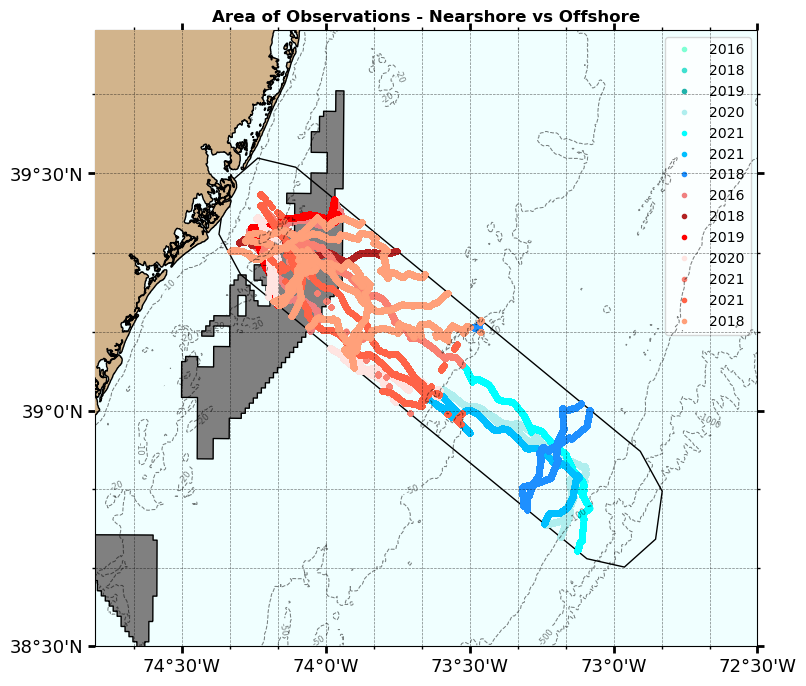

In [31]:
extent= [-74.8,-72.5,38.5,39.8]

#use cool maps to create cartopy map
fig, ax = cplt.create(extent, proj=ccrs.Mercator(),gridlines=True, bathymetry=True, isobaths=(-1000, -500, -100, -50, -20, -10), oceancolor='azure')
plt.title('Area of Observations - Nearshore vs Offshore',fontweight='bold')
   
lease_area = pd.read_pickle("lease_area.pkl"); lease_area.plot(ax= ax, color = 'grey', edgecolor = 'k', transform = ccrs.PlateCarree())

# Choose whichever isobath you want for inshore/offshore
isobath_cutoff = -50

# Plot glider transects that have been trimmed to just what is inside the e-line envelope. You could loop this as well for a tidier code.
# Plot the offshores first
plt.plot(df1[df1.nearest_bathy_value<isobath_cutoff].longitude,df1[df1.nearest_bathy_value<isobath_cutoff].latitude, '.', color= 'aquamarine', label='2016', transform=ccrs.PlateCarree())
plt.plot(df2[df2.nearest_bathy_value<isobath_cutoff].longitude,df2[df2.nearest_bathy_value<isobath_cutoff].latitude, '.', color= 'turquoise', label='2018', transform=ccrs.PlateCarree())
plt.plot(df3[df3.nearest_bathy_value<isobath_cutoff].longitude,df3[df3.nearest_bathy_value<isobath_cutoff].latitude, '.', color= 'lightseagreen', label='2019', transform=ccrs.PlateCarree())
plt.plot(df4[df4.nearest_bathy_value<isobath_cutoff].longitude,df4[df4.nearest_bathy_value<isobath_cutoff].latitude, '.', color= 'paleturquoise', label='2020', transform=ccrs.PlateCarree())
plt.plot(df5[df5.nearest_bathy_value<isobath_cutoff].longitude,df5[df5.nearest_bathy_value<isobath_cutoff].latitude, '.', color= 'aqua', label='2021', transform=ccrs.PlateCarree())
plt.plot(df6[df6.nearest_bathy_value<isobath_cutoff].longitude,df6[df6.nearest_bathy_value<isobath_cutoff].latitude, '.', color= 'deepskyblue', label='2021', transform=ccrs.PlateCarree())
plt.plot(df8[df8.nearest_bathy_value<isobath_cutoff].longitude,df8[df8.nearest_bathy_value<isobath_cutoff].latitude, '.', color= 'dodgerblue', label='2018', transform=ccrs.PlateCarree())
# Then the inshores next
plt.plot(df1[df1.nearest_bathy_value>isobath_cutoff].longitude,df1[df1.nearest_bathy_value>isobath_cutoff].latitude, '.', color= 'lightcoral', label='2016', transform=ccrs.PlateCarree())
plt.plot(df2[df2.nearest_bathy_value>isobath_cutoff].longitude,df2[df2.nearest_bathy_value>isobath_cutoff].latitude, '.', color= 'firebrick', label='2018', transform=ccrs.PlateCarree())
plt.plot(df3[df3.nearest_bathy_value>isobath_cutoff].longitude,df3[df3.nearest_bathy_value>isobath_cutoff].latitude, '.', color= 'red', label='2019', transform=ccrs.PlateCarree())
plt.plot(df4[df4.nearest_bathy_value>isobath_cutoff].longitude,df4[df4.nearest_bathy_value>isobath_cutoff].latitude, '.', color= 'mistyrose', label='2020', transform=ccrs.PlateCarree())
plt.plot(df5[df5.nearest_bathy_value>isobath_cutoff].longitude,df5[df5.nearest_bathy_value>isobath_cutoff].latitude, '.', color= 'salmon', label='2021', transform=ccrs.PlateCarree())
plt.plot(df6[df6.nearest_bathy_value>isobath_cutoff].longitude,df6[df6.nearest_bathy_value>isobath_cutoff].latitude, '.', color= 'tomato', label='2021', transform=ccrs.PlateCarree())
plt.plot(df8[df8.nearest_bathy_value>isobath_cutoff].longitude,df8[df8.nearest_bathy_value>isobath_cutoff].latitude, '.', color= 'lightsalmon', label='2018', transform=ccrs.PlateCarree())

##Plot box around endurance line using polygon
plt.fill(ed_lon,ed_lat, facecolor='none', edgecolor = 'k', transform=ccrs.PlateCarree())
plt.legend()
# plt.imshow()